In [1]:
# Importaciones
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
sv = pd.read_csv('11-2023_m30.csv', sep=';', quotechar='"')
sv_encabezados = ["id", "fecha", "tipo_elem", "intensidad", "ocupacion", "carga", "vmed", "error", "periodo_integracion"]
sv_atributos = ["intensidad", "ocupacion", "carga", "vmed"]

sl = pd.read_csv('pmed_ubicacion_10-2023_M30.csv', sep=';', quotechar='"')
sl_encabezados = ["tipo_elem","distrito","id","cod_cent","nombre","utm_x","utm_y","longitud","latitud"]

In [4]:
cantSV = sv.shape[0]
cantSL = sl.shape[0]
print("Lineas en archivo de valores:", cantSV)
print("Lineas en archivo de ubicaciones:", cantSL)

Lineas en archivo de valores: 784308
Lineas en archivo de ubicaciones: 296


In [5]:
# Preparación
listaFechas = []
for v in range(cantSV):
    if sv["fecha"][v] not in listaFechas:
        listaFechas.append(sv["fecha"][v])
listaFechas.sort()
for v in range(4):
    print(listaFechas[v])

2023-11-01 00:00:00
2023-11-01 00:15:00
2023-11-01 00:30:00
2023-11-01 00:45:00


In [6]:
diccFechaPos = {}
aux = 0
for f in listaFechas:
    diccFechaPos[f] = aux
    aux += 1

In [7]:
# Diccionarios de sensor-codigo y codigo-sensor
diccCodId = {}
diccIdCod = {}
for x in range(cantSL):
    if sl["tipo_elem"][x] == "M30":
        if sl["cod_cent"][x] not in diccCodId:
            diccCodId[sl["cod_cent"][x]] = sl["id"][x]
            diccIdCod[sl["id"][x]] = sl["cod_cent"][x]
        else:
            print("Codigo", sl["cod_cent"][x], "ya existe con identificador", diccCodId[sl["cod_cent"][x]], "y se encontró un segundo id:", sl["id"][x])
            
print(len(diccCodId), "codigos.")
print(len(diccIdCod), "identificadores.")

296 codigos.
296 identificadores.


In [8]:
# EXTRA: Verificando datos del código en duplicado para el mismo código
id1 = 6704
id2 = 11376
v1 = []
v2 = []
for x in range(cantSV):
    if sv["id"][x] == id1:
        v = []
        for a in sv_atributos:
            v.append(sv[a][x])
        v1.append(v)
    if sv["id"][x] == id2:
        v = []
        for a in sv_atributos:
            v.append(sv[a][x])
        v2.append(v)

In [9]:
# Continuación
if v1 == v2:
    print("OK")
else:
    print("NO")
    print("len:", len(v1), len(v2))

NO
len: 3 0


In [10]:
diccIdPosicion = {}
aux = 0
for id in diccIdCod:
    diccIdPosicion[id] = aux
    aux += 1
cantSensores = len(diccIdCod)
cantFechas = len(listaFechas)
# Grillas de valores
grillaIntensidad = np.full((cantSensores,cantFechas), -50)
grillaOcupacion = np.full((cantSensores,cantFechas), -50)
grillaCarga = np.full((cantSensores,cantFechas), -50)
grillaVelocidad = np.full((cantSensores,cantFechas), -50)

diccIdRegistros = {}

for x in range(cantSV):
    s = sv['id'][x]
    f = sv['fecha'][x]
    ps = diccIdPosicion[s]
    pf = diccFechaPos[f]

    if s not in diccIdRegistros:
        diccIdRegistros[s] = 1
    else:
        diccIdRegistros[s] += 1
        
    if not math.isnan(sv['intensidad'][x]):
        grillaIntensidad[ps][pf] = int(sv['intensidad'][x])
    else:
        grillaIntensidad[ps][pf] = -100
    
    if not math.isnan(sv['ocupacion'][x]):
        grillaOcupacion[ps][pf] = int(sv['ocupacion'][x])
    else:
        grillaOcupacion[ps][pf] = -100
    
    if not math.isnan(sv['carga'][x]):
        grillaCarga[ps][pf] = int(sv['carga'][x])
    else:
        grillaCarga[ps][pf] = -100
    
    if not math.isnan(sv['vmed'][x]):
        grillaVelocidad[ps][pf] = int(sv['vmed'][x])
    else:
        grillaVelocidad[ps][pf] = -100

In [11]:
for idR in diccIdRegistros:
    if diccIdRegistros[idR] < 2880:
        print(idR, diccIdRegistros[idR])

3488 2847
3490 2758
3491 2854
3492 2816
3493 2879
3510 108
3521 2873
3532 2875
3533 2878
3538 2324
3559 2876
3560 2879
3611 2877
3797 2878
3799 2795
3800 2840
3815 2435
3816 2862
3817 2878
3818 2720
3819 2870
3820 2638
3823 2872
3826 2870
3837 2876
3839 2877
6639 2697
6640 2877
6641 2846
6644 2864
6645 2866
6646 1760
6647 2377
6648 2879
6649 2848
6650 2867
6651 2868
6654 2846
6663 2705
6664 2559
6665 2475
6674 2872
6676 2725
6677 2872
6679 2841
6680 2788
6682 2859
6683 2745
6684 2877
6686 2878
6687 2878
6688 2736
6689 2703
6690 2643
6691 2855
6693 2879
6695 2826
6696 2317
6697 2879
6703 2873
6704 3
6705 3
6711 2876
6714 2872
6715 2847
6716 2858
6717 2774
6718 2418
6719 2879
6720 2796
6721 2710
6722 2878
6723 2835
6724 2007
6726 2867
6727 2161
6728 2477
6729 2791
6730 2858
6732 2718
6733 2192
6734 2803
6735 2879
6737 2844
6738 2878
6740 2878
6743 2852
6746 2844
6747 795
6749 2869
6751 2748
6753 2873
6755 2879
6757 2864
6758 2853
6759 2861
6760 2874
6766 2879
6767 2051
6773 2659
6774 287

In [12]:
diccIDnan = {} # Diccionario de id-list
for s in diccIdPosicion:
    ps = diccIdPosicion[s]
    contI = 0
    for gi in grillaIntensidad[ps]:
        if gi < 0:
            contI += 1
    contO = 0
    for go in grillaOcupacion[ps]:
        if go < 0:
            contO += 1
    contC = 0
    for gc in grillaCarga[ps]:
        if gc < 0:
            contC += 1
    contV = 0
    for gv in grillaVelocidad[ps]:
        if gv < 0:
            contV += 1
    l = [contI,contO, contC, contV]
    if sum(l) > 0:
        diccIDnan[s] = l
print(len(diccIDnan), "sensores con valores ausentes")

202 sensores con valores ausentes


In [13]:
for d in diccIDnan:
    print(d, diccIDnan[d])

6640 [3, 3, 3, 3]
6641 [34, 34, 34, 34]
6643 [0, 0, 0, 2]
6644 [16, 16, 16, 16]
6645 [14, 14, 14, 14]
6646 [1120, 1120, 1120, 1120]
6647 [503, 503, 503, 503]
6648 [1, 1, 1, 1]
6649 [32, 32, 32, 32]
10297 [1440, 1440, 1440, 1440]
6650 [13, 13, 13, 13]
6651 [12, 12, 12, 12]
6652 [0, 0, 0, 2]
6654 [34, 34, 34, 34]
10175 [1, 1, 1, 1]
3817 [2, 2, 2, 2]
3818 [160, 160, 160, 160]
3819 [10, 10, 10, 10]
10172 [3, 3, 3, 3]
3820 [242, 242, 242, 242]
6663 [175, 175, 175, 175]
10173 [0, 0, 0, 12]
3799 [85, 85, 85, 85]
3800 [40, 40, 40, 40]
6664 [321, 321, 321, 321]
6665 [405, 405, 405, 405]
3488 [33, 33, 33, 33]
10662 [2, 2, 2, 7]
3611 [3, 3, 3, 3]
6669 [0, 0, 0, 15]
3815 [445, 445, 445, 445]
3490 [122, 122, 122, 122]
3491 [26, 26, 26, 26]
3492 [64, 64, 64, 64]
3493 [1, 1, 1, 21]
3816 [18, 18, 18, 19]
6671 [0, 0, 0, 79]
6674 [8, 8, 8, 8]
7124 [2621, 2621, 2621, 2621]
6676 [155, 155, 155, 155]
6677 [8, 8, 8, 8]
6678 [0, 0, 0, 33]
6679 [39, 39, 39, 39]
6820 [17, 17, 17, 152]
6680 [92, 92, 92, 92]
668

In [55]:
diccIdNanSeg = {}

In [62]:
def cuentaNANseguidos():
    diccIdNanSeg = {}
    for d in diccIDnan:
        ps = diccIdPosicion[d]
        maxI = 0
        maxO = 0
        maxC = 0
        maxV = 0    
        
        prev = 0
        for v in grillaIntensidad[ps]:
            if v < 0:
                prev += 1
                if prev > maxI:
                    maxI = prev
            else:
                prev = 0
        prev = 0
        for v in grillaOcupacion[ps]:
            if v < 0:
                prev += 1
                if prev > maxO:
                    maxO = prev
            else:
                prev = 0
        prev = 0
        for v in grillaCarga[ps]:
            if v < 0:
                prev += 1
                if prev > maxC:
                    maxC = prev
            else:
                prev = 0
        prev = 0
        for v in grillaVelocidad[ps]:
            if v < 0:
                prev += 1
                if prev > maxV:
                    maxV = prev
            else:
                prev = 0
        diccIdNanSeg[d] = [maxI, maxO, maxC, maxV]
    for d in diccIdNanSeg:
        print("id:", d, "- codigo:", diccIdCod[d], " - max nan seguidos:", diccIdNanSeg[d], " - cantidad nan:", diccIDnan[d])
    return diccIdNanSeg

In [63]:
# Cuenta previo corrección
diccIdNanSeg = cuentaNANseguidos()

id: 6640 - codigo: PM10013  - max nan seguidos: [2, 2, 2, 2]  - cantidad nan: [3, 3, 3, 3]
id: 6641 - codigo: PM10021  - max nan seguidos: [5, 5, 5, 5]  - cantidad nan: [34, 34, 34, 34]
id: 6643 - codigo: PM10092  - max nan seguidos: [0, 0, 0, 1]  - cantidad nan: [0, 0, 0, 2]
id: 6644 - codigo: PM10141  - max nan seguidos: [2, 2, 2, 2]  - cantidad nan: [16, 16, 16, 16]
id: 6645 - codigo: PM10142  - max nan seguidos: [2, 2, 2, 2]  - cantidad nan: [14, 14, 14, 14]
id: 6646 - codigo: PM10211  - max nan seguidos: [42, 42, 42, 42]  - cantidad nan: [1120, 1120, 1120, 1120]
id: 6647 - codigo: PM10212  - max nan seguidos: [11, 11, 11, 11]  - cantidad nan: [503, 503, 503, 503]
id: 6648 - codigo: PM10241  - max nan seguidos: [1, 1, 1, 1]  - cantidad nan: [1, 1, 1, 1]
id: 6649 - codigo: PM10242  - max nan seguidos: [4, 4, 4, 4]  - cantidad nan: [32, 32, 32, 32]
id: 10297 - codigo: PM10293  - max nan seguidos: [1218, 1218, 1218, 1218]  - cantidad nan: [1440, 1440, 1440, 1440]
id: 6650 - codigo: PM

In [82]:
def plotDatosAusentes():
    ausentesI = np.full(len(diccIdPosicion), 1)
    ausentesO = np.full(len(diccIdPosicion), 1)
    ausentesC = np.full(len(diccIdPosicion), 1)
    ausentesV = np.full(len(diccIdPosicion), 1)
    for d in diccIdNanSeg:
        ps = diccIdPosicion[d]
        li = diccIdNanSeg[d]
        ausentesI[ps] = li[0]+1
        ausentesO[ps] = li[1]+1
        ausentesC[ps] = li[2]+1
        ausentesV[ps] = li[3]+1
    ausentesI.sort()
    ausentesO.sort()
    ausentesC.sort()
    ausentesV.sort()
    plt.plot(ausentesI, label='Intensidad', color='blue')
    plt.plot(ausentesO, label='Ocupación', color='orange')
    plt.plot(ausentesC, label='Carga', color='green')
    plt.plot(ausentesV, label='Velocidad', color='red')
    plt.title("Datos NAN/Ausentes del conjunto")
    plt.grid(axis='y')
    plt.yscale('log')
    plt.legend()
    plt.show()
    plt.close()

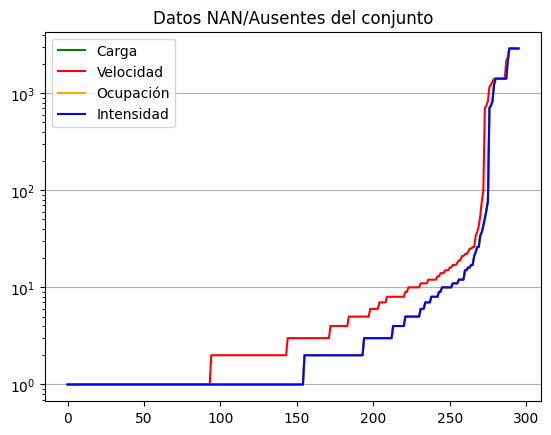

In [83]:
plotDatosAusentes()

In [72]:
def corrigeDatos(lista):
    limite = len(lista)
    indice = 0
    vPrev = 0
    while indice < limite :
        if lista[indice] >= 0:
            vPrev = lista[indice]
            indice += 1
        else:
            desde = indice
            hasta = indice+1
            while (indice < limite) and (lista[indice] < 0):
                indice += 1
                hasta = indice
            cant = hasta - desde
            vProx = 0
            if hasta < limite:
                vProx = lista[hasta]
            delta = int((vProx - vPrev) / int(hasta - desde))
            for i in range(desde, hasta):
                lista[i] = vPrev + delta
                vPrev = lista[i]
    return lista